In [7]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

In [4]:
def find_empty_cells(grid, pos):
    """find for a given site (pos) the neighbours that are empty"""
    x, y = pos
    dim = grid.shape[0]
    empty_cells = []
    if x > 0:
        if grid[x - 1, y] == 0:
            empty_cells.append((x - 1, y))
    if x < dim - 1:
        if grid[x + 1, y] == 0:
            empty_cells.append((x + 1, y))
    if y > 0:
        if grid[x, y - 1] == 0:
            empty_cells.append((x, y - 1))
    if y < dim - 1:
        if grid[x, y + 1] == 0:
            empty_cells.append((x, y + 1))
            
    return empty_cells

In [5]:
steps = 25
samples = 10

center = 26
length = (2 * (center - 1)) + 1

results_x = []
results_y = []

for i in range(steps):
    p = i * (1.0 / steps)
    successes = 0
    for j in range(samples):
        grid = np.zeros((length, length))
        grid = np.random.choice(a=[1, 0], size=(length, length), p=[p, 1-p])
        grid[center, center] = 0
        
        d = []
        cells_to_be_tested = deque()


        if grid[center, center] == 0:
            d.append((center, center))
            cells_to_be_tested.append((center, center))


    
        while cells_to_be_tested:
            cell = cells_to_be_tested.popleft()
            cell_candidates = find_empty_cells(grid, cell)
            for cell in cell_candidates:
                if cell not in d:
                    d.append(cell)
                    cells_to_be_tested.append(cell)   
                    
        for cell in d:
            x, y = cell
            if x == 0 or y == 0 or x == grid.shape[0] or y == grid.shape[1]:
                successes += 1
                break
                
    results_x.append(1-p) 
    results_y.append(successes / samples)

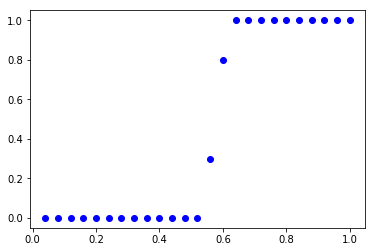

In [8]:
plt.plot(results_x, results_y, 'bo')